In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage

In [12]:
f = h5py.File('snapshot_650_9.hdf5', 'r')
#f['Header'].attrs.keys()
electron_abundance = f['PartType0']['ElectronAbundance'].value
internal_energy = f['PartType0']['InternalEnergy'].value
mass = f['PartType0']['Masses'].value
velocities = f['PartType0']['Velocities'].value
mass = mass * 10**10
print(f['PartType0'].keys())

<ipython-input-12-bfeba97eda05>:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  electron_abundance = f['PartType0']['ElectronAbundance'].value
<ipython-input-12-bfeba97eda05>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  internal_energy = f['PartType0']['InternalEnergy'].value
<ipython-input-12-bfeba97eda05>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  mass = f['PartType0']['Masses'].value


<KeysViewHDF5 ['Coordinates', 'Density', 'DensityGradient', 'ElectronAbundance', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_Metals', 'InternalEnergy', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'Velocities', 'VelocityCurl', 'VelocityDivergence', 'Vorticity']>


<ipython-input-12-bfeba97eda05>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  velocities = f['PartType0']['Velocities'].value


In [13]:
#calculating mean molecular weight
m_p = 1.673 * 10**(-24)
molecular_weight = (4)/(1 + 3*0.76 + electron_abundance * 4 * 0.76)
molecular_weight = molecular_weight*m_p

#calculating temperature
internal_energy = internal_energy/(1.38*10**(-16))
constant = ((5/3-1)*(10**10))
temperature = molecular_weight * constant * internal_energy

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 6.00000e+00, 2.00000e+00,
        5.00000e+00, 6.00000e+00, 5.00000e+00, 1.10000e+01, 6.00000e+00,
        1.30000e+01, 1.90000e+01, 1.60000e+01, 2.40000e+01, 1.70000e+01,
        3.40000e+01, 2.80000e+01, 5.30000e+01, 7.00000e+01, 6.20000e+01,
        7.60000e+01, 6.50000e+01, 1.10000e+02, 1.00000e+02, 1.40000e+02,
        1.34000e+02, 1.35000e+02, 1.58000e+02, 1.57000e+02, 1.79000e+02,
        1.91000e+02, 2.12000e+02, 2.45000e+02, 2.91000e+02, 2.89000e+02,
        3.05000e+02, 3.56000e+02, 3.84000e+02, 4.48000e+02, 4.38000e+02,
        4.99000e+02, 5.46000e+02, 6.26000e+02, 5.96000e+02, 7.19000e+02,
        7.74000e+02, 7.96000e+02, 8.58000e+02, 8.93000e+02, 9.02000e+02,
        9.63000e+02, 1.01200e+03, 1.03300e+03, 1.11

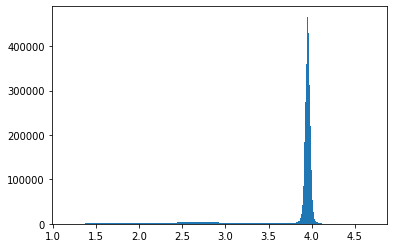

In [14]:
plt.hist(np.log10(temperature), bins=1000)

In [4]:
#calculating 1D velocity
velocity = np.sqrt(np.sum(velocities**2, axis=1))

In [5]:
#calculating speed of sound
num = (5/3)*(1.3807*(10**(-16)))*temperature 
sound = num/molecular_weight
sound = np.sqrt(sound)

#calculating mach 
mach = np.divide(velocity, sound)

In [14]:
#edges of plot for temp projection
coord = f['PartType0']['Coordinates'].value
x_coord = coord[:,0]
y_coord = coord[:,1]
nbins = 500
xedges = np.linspace(min(x_coord),max(x_coord), num = nbins)
yedges = np.linspace(min(y_coord),max(y_coord), num = nbins)
#calculating mass weighted temperature
mass_sums, xbins, ybins = np.histogram2d(x_coord, y_coord, bins=(xedges, yedges), weights = mass)
mass_x_temp = mass * temperature
mass_x_temp_sums, xbins, ybins = np.histogram2d(x_coord, y_coord, bins=(xedges, yedges), weights = mass_x_temp)
weighted_temp = mass_x_temp_sums / mass_sums

<ipython-input-14-cfd10baee3a6>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  coord = f['PartType0']['Coordinates'].value
<ipython-input-14-cfd10baee3a6>:12: RuntimeWarning: invalid value encountered in true_divide
  weighted_temp = mass_x_temp_sums / mass_sums


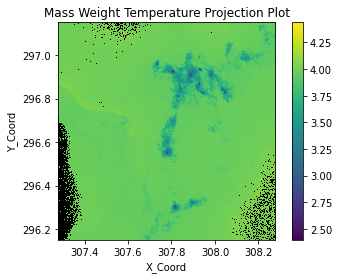

In [15]:
#plotting mass weighted temperature
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='black')
plt.imshow(np.log10(weighted_temp.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)
plt.xlabel("X_Coord")
plt.ylabel("Y_Coord")
plt.title('Mass Weight Temperature Projection Plot')
plt.colorbar()
plt.savefig('Temp_Projection_600')
plt.show()

<ipython-input-52-f212e5331ca9>:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(mach.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)


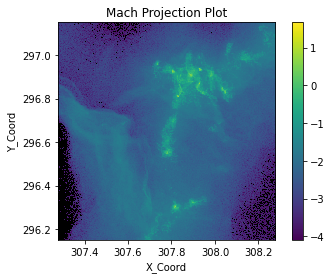

In [52]:
#plotting mach # projection 
mach, xbins, ybins = np.histogram2d(x_coord, y_coord, bins=(xedges, yedges), weights = mach)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='black')
plt.imshow(np.log10(mach.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)
plt.xlabel("X_Coord")
plt.ylabel("Y_Coord")
plt.title('Mach Projection Plot')
plt.colorbar()
plt.savefig('Mach_Projection_600')
plt.show()